In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

There are two general types of crime that would be particularly concerning to someone moving into a neighborhood:
- violent crime: robbery, assault
- quality of life crime: car break ins, drug activity

# Import the Data

In [3]:
#read data in from pickle file
df = pd.read_pickle('C:/Users/Stacey/Downloads/NY_complaint_data_cleaned.pkl')

In [4]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,PARKS_NM,HADEVELOPT,Latitude,Longitude,CMPLNT_FR_DATE,CMPLNT_FR_DATE_YEAR,CMPLNT_FR_DATE_MONTH,BORO,CAT_OFNS,BORO_PREC
0,101109527,12/31/2015,23:45:00,NaT,nan,2015-12-31,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,NaN,NaN,40.828848,-73.916661,2015-12-31,2015,12,BRONX,FELONY-FORGERY,BRONX-44
1,153401121,12/31/2015,23:36:00,NaT,nan,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaN,NaN,40.697338,-73.784557,2015-12-31,2015,12,QUEENS,FELONY-MURDER & NON-NEGL. MANSLAUGHTER,QUEENS-103
2,569369778,12/31/2015,23:30:00,NaT,nan,2015-12-31,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,NaN,40.802607,-73.945052,2015-12-31,2015,12,MANHATTAN,FELONY-DANGEROUS DRUGS,MANHATTAN-28
3,968417082,12/31/2015,23:30:00,NaT,nan,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,NaN,40.654549,-73.726339,2015-12-31,2015,12,QUEENS,MISDEMEANOR-ASSAULT 3 & RELATED OFFENSES,QUEENS-105
4,641637920,12/31/2015,23:25:00,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,NaN,40.738002,-73.987891,2015-12-31,2015,12,MANHATTAN,MISDEMEANOR-ASSAULT 3 & RELATED OFFENSES,MANHATTAN-13


In [5]:
df.shape

(5560057, 27)

In [6]:
#view details of offense in a separate file
offense_details = df[['LAW_CAT_CD','OFNS_DESC','PD_DESC']].drop_duplicates()

In [7]:
#output details to file
offense_details.to_csv('C:/Users/Stacey/Downloads/offense_details.csv')

Not all observations have an OFNS_DESC, check what perecentage

In [8]:
#get number of observations that have no OFNS_DESC
print(len(df[df['OFNS_DESC'].isnull()]))
print(len(df))
#less than 1% of observations are missing an OFNS_DESC

18824
5560057


In [9]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,PARKS_NM,HADEVELOPT,Latitude,Longitude,CMPLNT_FR_DATE,CMPLNT_FR_DATE_YEAR,CMPLNT_FR_DATE_MONTH,BORO,CAT_OFNS,BORO_PREC
0,101109527,12/31/2015,23:45:00,NaT,nan,2015-12-31,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,NaN,NaN,40.828848,-73.916661,2015-12-31,2015,12,BRONX,FELONY-FORGERY,BRONX-44
1,153401121,12/31/2015,23:36:00,NaT,nan,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaN,NaN,40.697338,-73.784557,2015-12-31,2015,12,QUEENS,FELONY-MURDER & NON-NEGL. MANSLAUGHTER,QUEENS-103
2,569369778,12/31/2015,23:30:00,NaT,nan,2015-12-31,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,NaN,40.802607,-73.945052,2015-12-31,2015,12,MANHATTAN,FELONY-DANGEROUS DRUGS,MANHATTAN-28
3,968417082,12/31/2015,23:30:00,NaT,nan,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,NaN,40.654549,-73.726339,2015-12-31,2015,12,QUEENS,MISDEMEANOR-ASSAULT 3 & RELATED OFFENSES,QUEENS-105
4,641637920,12/31/2015,23:25:00,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,NaN,40.738002,-73.987891,2015-12-31,2015,12,MANHATTAN,MISDEMEANOR-ASSAULT 3 & RELATED OFFENSES,MANHATTAN-13


** Create grouped dataframes for heatmaps **

In [10]:
#group complaint data by year, month, borough, precinct, category, 
#description
df_agg = df[['CMPLNT_NUM','CMPLNT_FR_DATE_YEAR','CMPLNT_FR_DATE_MONTH',
             'BORO','BORO_PREC','PRECINCT','LAW_CAT_CD','OFNS_DESC','CAT_OFNS']
           ].groupby(['CMPLNT_FR_DATE_YEAR','CMPLNT_FR_DATE_MONTH',
                      'BORO','BORO_PREC','PRECINCT','LAW_CAT_CD',
                      'OFNS_DESC','CAT_OFNS'],as_index=False).agg(['count'])

#reformat headers
df_agg.columns = ['_'.join(tup).rstrip('_') for tup in df_agg.columns.values]
df_agg.reset_index(col_level=1,inplace = True)

In [11]:
df_agg.head()

,CMPLNT_FR_DATE_YEAR,CMPLNT_FR_DATE_MONTH,BORO,BORO_PREC,PRECINCT,LAW_CAT_CD,OFNS_DESC,CAT_OFNS,CMPLNT_NUM_count
0,2006,1,BRONX,BRONX-40,40,FELONY,ARSON,FELONY-ARSON,4
1,2006,1,BRONX,BRONX-40,40,FELONY,BURGLARY,FELONY-BURGLARY,28
2,2006,1,BRONX,BRONX-40,40,FELONY,CRIMINAL MISCHIEF & RELATED OF,FELONY-CRIMINAL MISCHIEF & RELATED OF,16
3,2006,1,BRONX,BRONX-40,40,FELONY,DANGEROUS DRUGS,FELONY-DANGEROUS DRUGS,30
4,2006,1,BRONX,BRONX-40,40,FELONY,DANGEROUS WEAPONS,FELONY-DANGEROUS WEAPONS,16


In [12]:
#group complaint data by year, borough, precinct, category, offense type
df_year = df_agg[['CMPLNT_NUM_count','CMPLNT_FR_DATE_YEAR',
             'BORO','PRECINCT','BORO_PREC','LAW_CAT_CD','CAT_OFNS','OFNS_DESC']
           ].groupby(['CMPLNT_FR_DATE_YEAR','BORO',
                      'PRECINCT','BORO_PREC','LAW_CAT_CD','CAT_OFNS','OFNS_DESC'
                     ],as_index=False).agg(['sum'])

#reformat headers
df_year.columns = ['_'.join(tup).rstrip('_') for tup in df_year.columns.values]
df_year.reset_index(col_level=1,inplace = True)

In [13]:
df_year.head()

,CMPLNT_FR_DATE_YEAR,BORO,PRECINCT,BORO_PREC,LAW_CAT_CD,CAT_OFNS,OFNS_DESC,CMPLNT_NUM_count_sum
0,2006,BRONX,40,BRONX-40,FELONY,FELONY-ARSON,ARSON,52
1,2006,BRONX,40,BRONX-40,FELONY,FELONY-BURGLARY,BURGLARY,234
2,2006,BRONX,40,BRONX-40,FELONY,FELONY-CHILD ABANDONMENT/NON SUPPORT,CHILD ABANDONMENT/NON SUPPORT,1
3,2006,BRONX,40,BRONX-40,FELONY,FELONY-CRIMINAL MISCHIEF & RELATED OF,CRIMINAL MISCHIEF & RELATED OF,273
4,2006,BRONX,40,BRONX-40,FELONY,FELONY-DANGEROUS DRUGS,DANGEROUS DRUGS,358


In [14]:
#group complaint data by year,borough, precinct, category
df_cat = df_agg[['CMPLNT_NUM_count','CMPLNT_FR_DATE_YEAR',
             'BORO','PRECINCT','BORO_PREC','LAW_CAT_CD']
           ].groupby(['CMPLNT_FR_DATE_YEAR','BORO',
                      'PRECINCT','BORO_PREC','LAW_CAT_CD'
                     ],as_index=False).agg(['sum'])

#reformat headers
df_cat.columns = ['_'.join(tup).rstrip('_') for tup in df_cat.columns.values]
df_cat.reset_index(col_level=1,inplace = True)

In [15]:
df_cat.head()

,CMPLNT_FR_DATE_YEAR,BORO,PRECINCT,BORO_PREC,LAW_CAT_CD,CMPLNT_NUM_count_sum
0,2006,BRONX,40,BRONX-40,FELONY,3175
1,2006,BRONX,40,BRONX-40,MISDEMEANOR,7792
2,2006,BRONX,40,BRONX-40,VIOLATION,1572
3,2006,BRONX,41,BRONX-41,FELONY,1980
4,2006,BRONX,41,BRONX-41,MISDEMEANOR,3270


In [16]:
#group complaint data by year, borough, and precinct
df_boro_precinct = df_agg[['CMPLNT_NUM_count','CMPLNT_FR_DATE_YEAR',
             'BORO','BORO_PREC','PRECINCT']
           ].groupby(['CMPLNT_FR_DATE_YEAR','BORO','BORO_PREC',
                      'PRECINCT'
                     ],as_index=False).agg(['sum'])

#reformat headers
df_boro_precinct.columns = ['_'.join(tup).rstrip('_') for tup in df_boro_precinct.columns.values]
df_boro_precinct.reset_index(col_level=1,inplace = True)

In [17]:
df_boro_precinct.head()

,CMPLNT_FR_DATE_YEAR,BORO,BORO_PREC,PRECINCT,CMPLNT_NUM_count_sum
0,2006,BRONX,BRONX-40,40,12539
1,2006,BRONX,BRONX-41,41,6186
2,2006,BRONX,BRONX-42,42,8602
3,2006,BRONX,BRONX-43,43,14290
4,2006,BRONX,BRONX-44,44,13215


In [18]:
#group complaint data by year and precinct
df_precinct = df_agg[['CMPLNT_NUM_count','CMPLNT_FR_DATE_YEAR',
             'PRECINCT','BORO_PREC']
           ].groupby(['CMPLNT_FR_DATE_YEAR','PRECINCT','BORO_PREC'
                     ],as_index=False).agg(['sum'])

#reformat headers
df_precinct.columns = ['_'.join(tup).rstrip('_') for tup in df_precinct.columns.values]
df_precinct.reset_index(col_level=1,inplace = True)

In [19]:
df_precinct.head()

,CMPLNT_FR_DATE_YEAR,PRECINCT,BORO_PREC,CMPLNT_NUM_count_sum
0,2006,1,MANHATTAN-1,6335
1,2006,5,MANHATTAN-5,4240
2,2006,6,MANHATTAN-6,5756
3,2006,7,MANHATTAN-7,3853
4,2006,9,MANHATTAN-9,6418


# Highest and lowest crime neighborhoods (precincts), citywide and by borough

In [20]:
#create function to set up pivots for seaborn heatmap
def pivot_create(df,var1,var2,var3):
    #pivot the data
    df_pivot = df[[var1,var2,var3]].pivot(var1,var2,var3)
    #fillna values with 0
    df_pivot.fillna(0, inplace = True)
    #change datatype to int
    df_pivot = df_pivot.apply(pd.to_numeric).astype(int)
    return df_pivot

In [21]:
#create an aggregate dataframe by precinct of total crime rates
precinct_pivot = pivot_create(df_precinct,'BORO_PREC','CMPLNT_FR_DATE_YEAR','CMPLNT_NUM_count_sum')

In [22]:
#sort descending by 2016 crime rates
precinct_pivot = precinct_pivot.sort_values(by = 2016, ascending = False)

** Create a heat map of crime by year by precinct citywide **

Text(69,0.5,'')

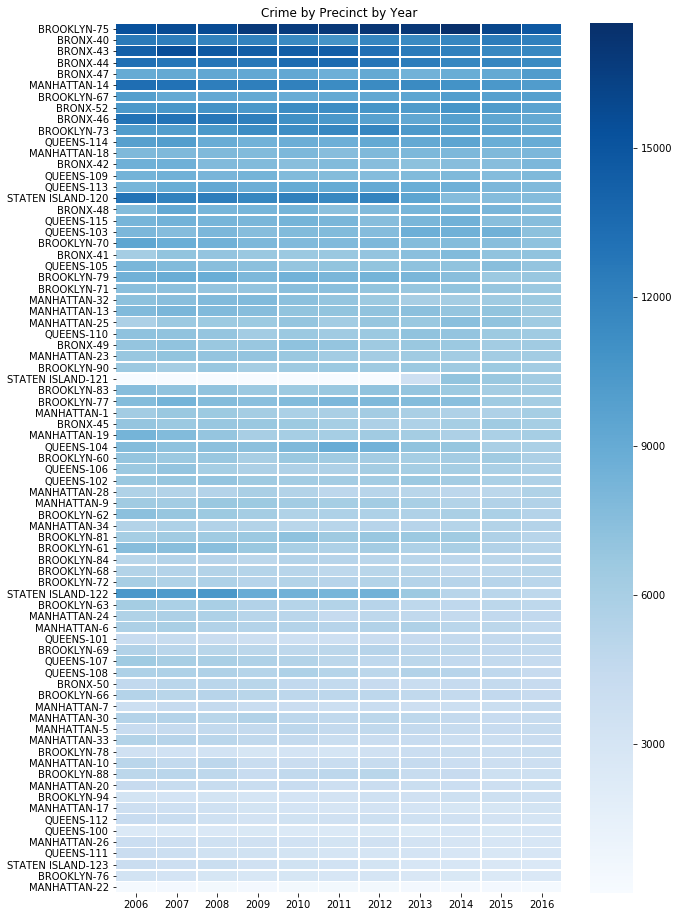

In [23]:
#create a heatmap by year by precinct of total crime rate
plt.figure(figsize=(10, 16))
sns.heatmap(precinct_pivot, annot=False, fmt="d", linewidths=0.5, cmap="Blues")
plt.title('Crime by Precinct by Year')
plt.xlabel('')
plt.ylabel('')

- The heat map is effectively indexed to the highest crime level for any precinct in any year, which is Precinct 75 in Brooklyn in 2014. 
- The precinct with the highest crime incidence is in Brooklyn, while 4 of the top 5 are in the Bronx
- The 5 lowest crime areas include precincts in all boroughs except the Bronx. 
- Staten Island precinct 121 was created from parts of 120 and 122, so although precinct 120 and 122 appears to show substantial improvement in 2013 it's not a pure comparison. 
- Areas with the highest and lowest crime in 2006 tended to stay that way respectively through 2016
- Some areas appear to have improved such as the 79th precinct in Brooklyn and the 19th Precinct in Manhattan, while others appear to have declined such as the 47th precinct in the Bronx and the 67th in Brooklyn.

** Create heat maps of crime by year by precinct for each borough **

In [24]:
precinct_by_boro = df[['BORO_PREC','BORO']].drop_duplicates()
precinct_by_boro.head()
precinct_by_boro.index = precinct_by_boro.BORO_PREC
precinct_by_boro.drop('BORO_PREC',axis=1,inplace=True)

In [25]:
#order Borough by 2016 populations size: 
#source: http://www1.nyc.gov/site/planning/data-maps/nyc-population/current-future-populations.page
#Brooklyn: 2,629,150, Queens: 2,333,054, Manhattan: 1,643,734, 
#Bronx: 1,455,730, Staten Island: 476,015
boro_order = ['BROOKLYN','QUEENS','MANHATTAN','BRONX','STATEN ISLAND']

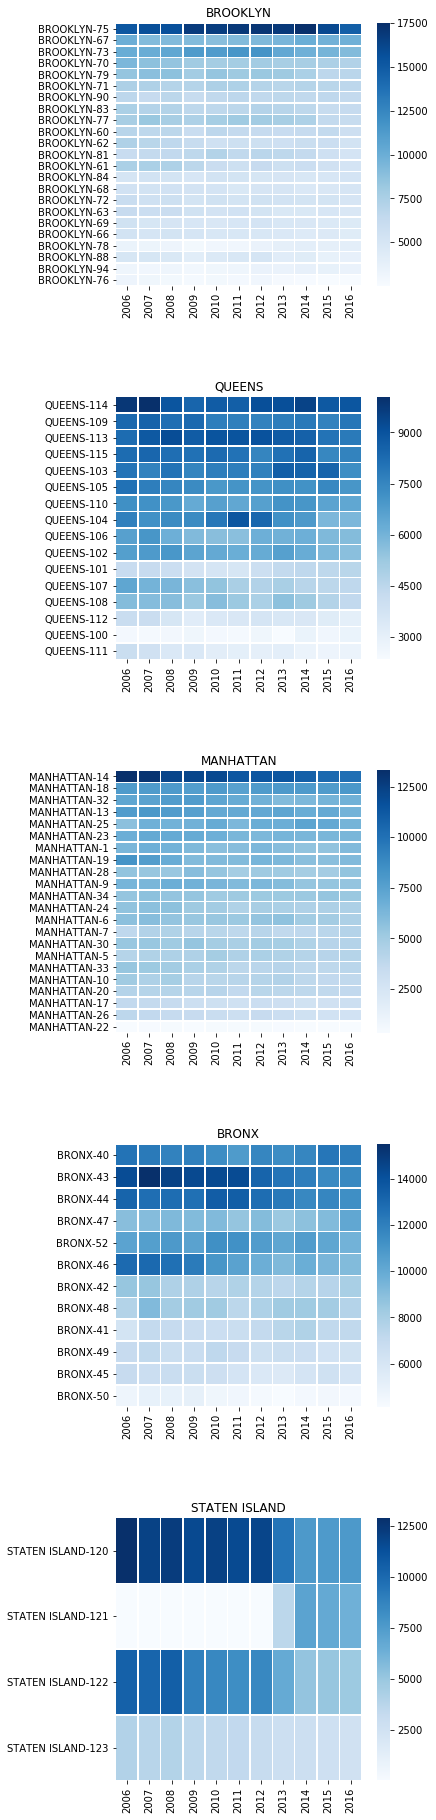

In [26]:
f, axs = plt.subplots(5, 1, figsize=(5, 25))
plt.tight_layout(h_pad=9.0)
for i, ax in enumerate(axs.flat):
    boro = boro_order[i]
    precincts = list(precinct_by_boro[
        precinct_by_boro.BORO.str.contains(boro)].index)
    temp_pivot = precinct_pivot[precinct_pivot.index.isin(precincts)]
    sns.heatmap(temp_pivot, annot=False, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
    ax.set_title(boro)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
    ax.set_xlabel('')
    ax.set_ylabel('')

- These heat maps identify areas with relatively lower and higher crime levels within boroughs, however a relatively high crime level in Queens may still not be that high compared to Brooklyn.

# Areas that have improved/deteriorated consistently over the last 5 years (2012 - 2016)

# View 2016 total crime by precinct geographically

In [27]:
import geopandas as gpd

In [28]:
#open the precinct shape file from 
#https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page
police_precincts = gpd.read_file('zip://'+'nypp.zip')

In [29]:
#open the sector shape file from 
#https://data.cityofnewyork.us/Public-Safety/NYPD-Sectors/eizi-ujye/data
police_sectors = gpd.read_file('zip://'+'NYPD Sectors.zip')

In [30]:
type(police_precincts)

geopandas.geodataframe.GeoDataFrame

In [31]:
type(police_sectors)

geopandas.geodataframe.GeoDataFrame

In [32]:
police_precincts.head()

,Precinct,Shape_Leng,Shape_Area,geometry
0,1,79979.343304,4.718208e+07,(POLYGON ((972081.7882080078 190733.4674072266...
1,5,18676.124259,1.808880e+07,"POLYGON ((987399.2067871094 202660.9920043945,..."
2,6,27182.610113,2.213193e+07,"POLYGON ((984337.591796875 208351.1055908203, ..."
3,7,17301.475777,1.836339e+07,"POLYGON ((991608.8134155273 201215.206237793, ..."
4,9,19773.401872,2.139401e+07,"POLYGON ((992119.1235961914 204042.7609863281,..."


In [33]:
police_sectors.head()

,phase,sq_miles,sct_text,sector,pct,patrol_bor,geometry
0,00,0.364505,102A,102A,102,PBQS,POLYGON ((-73.81430922821157 40.69833533173145...
1,00,0.624857,102B,102B,102,PBQS,POLYGON ((-73.81993922438103 40.68939369236706...
2,00,0.419398,102C,102C,102,PBQS,POLYGON ((-73.83172298310878 40.68605070541808...
3,00,0.590337,102D,102D,102,PBQS,POLYGON ((-73.84125165911684 40.68333568189586...
4,00,0.464113,102E,102E,102,PBQS,POLYGON ((-73.85267726108292 40.68007941509821...


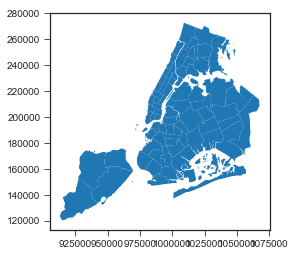

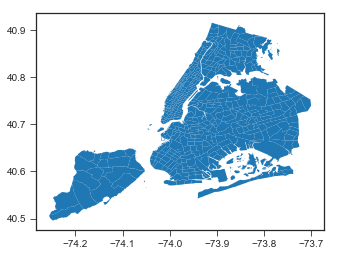

In [34]:
# view police precinct and sector maps
sns.set_style('ticks')
police_precincts.plot()
police_sectors.plot()

In [35]:
#view coordinate reference system
police_precincts_crs = police_precincts.crs
print(police_precincts_crs)

{'proj': 'lcc', 'lat_1': 40.66666666666666, 'lat_2': 41.03333333333333, 'lat_0': 40.16666666666666, 'lon_0': -74, 'x_0': 300000, 'y_0': 0, 'datum': 'NAD83', 'units': 'us-ft', 'no_defs': True}


In [36]:
#view coordinate reference system
police_sectors_crs = police_sectors.crs
print(police_sectors_crs)

{'init': 'epsg:4326'}


** The maps have different coordinate systems.    
The crime dataset does not contain sector information, however, it contains longitude latitude information in epsg:4326 which matches the CRS of the sector shape file, so we can connect the location of the reported occurence to the sector that contains it.   
To use the precinct shape file with the sector shape file it needs to be converted to ESPG:4326**  

In [37]:
#get 2016 data only
df_precinct_2016 = df_precinct[df_precinct.CMPLNT_FR_DATE_YEAR == 2016]

In [38]:
df_precinct_2016.head()

,CMPLNT_FR_DATE_YEAR,PRECINCT,BORO_PREC,CMPLNT_NUM_count_sum
770,2016,1,MANHATTAN-1,6137
771,2016,5,MANHATTAN-5,4258
772,2016,6,MANHATTAN-6,4583
773,2016,7,MANHATTAN-7,4309
774,2016,9,MANHATTAN-9,5534


In [39]:
#merge 2016 dataframe into map dataframe
precincts_2016 = police_precincts.merge(df_precinct_2016, left_on = 'Precinct',
                      right_on = 'PRECINCT', how = 'left')

In [40]:
precincts_2016.head()

,Precinct,Shape_Leng,Shape_Area,geometry,CMPLNT_FR_DATE_YEAR,PRECINCT,BORO_PREC,CMPLNT_NUM_count_sum
0,1,79979.343304,4.718208e+07,(POLYGON ((972081.7882080078 190733.4674072266...,2016,1,MANHATTAN-1,6137
1,5,18676.124259,1.808880e+07,"POLYGON ((987399.2067871094 202660.9920043945,...",2016,5,MANHATTAN-5,4258
2,6,27182.610113,2.213193e+07,"POLYGON ((984337.591796875 208351.1055908203, ...",2016,6,MANHATTAN-6,4583
3,7,17301.475777,1.836339e+07,"POLYGON ((991608.8134155273 201215.206237793, ...",2016,7,MANHATTAN-7,4309
4,9,19773.401872,2.139401e+07,"POLYGON ((992119.1235961914 204042.7609863281,...",2016,9,MANHATTAN-9,5534


In [41]:
type(precincts_2016)

geopandas.geodataframe.GeoDataFrame

** View crimes by precinct geographically **

In [87]:
#creat a function to create a cloropleth map and heat map (as key)
def heat_maps_plot(title,col,pivot_df):
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10,5))
    plt.tight_layout(w_pad=9.0)
    st = fig.suptitle(title, fontsize="x-large")
    # shift subplots down:
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)

    precincts_2016.plot(column=col, cmap="Blues",ax=ax1)
    ax1.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off',
        right='off', 
        left='off',
        labelleft='off') # labels along the bottom edge are off

    sns.heatmap(pivot_df, annot=False, fmt="d", linewidths=0.5, cmap="Blues", ax=ax2)
    ax2.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off',
        right='off', 
        left='on',
        labelleft='off')    # labels along the bottom edge are off 
    ax2.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize = 8)  
    ax2.xaxis.label.set_visible(False)
    #ax2.set_ylabel('Precinct Number')
    ax2.set_xlabel('')
    ax2.set_ylabel('')

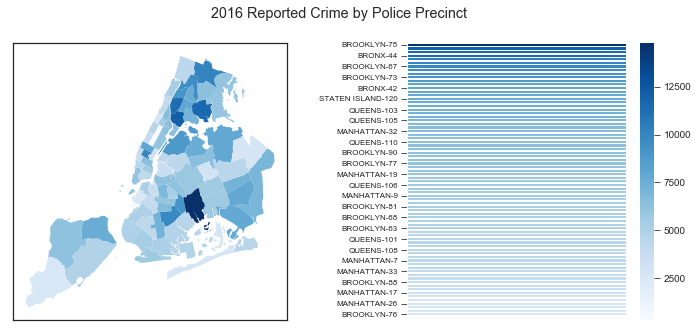

In [88]:
#create map of total 2016 crime
heat_maps_plot("2016 Reported Crime by Police Precinct",'CMPLNT_NUM_count_sum',precinct_pivot[[2016]])

The map provides a view of crime by precinct. In some cases precincts with high crime levels are bordered by precincts with high crime levels, but this is not consistently the case. Getting to the finer sector level will provide more information on where in the precinct this transition occurs.

# View heat map for a specific offense type for a specific year

Consider a quality of life crime like car break-ins and theft.    
Some NYC neighborhoods are generally considered safe but they have relatively high levels of car break-ins and theft.  
  
FELONY	GRAND LARCENY OF MOTOR VEHICLE	LARCENY, GRAND OF AUTO - ATTEM
FELONY	GRAND LARCENY OF MOTOR VEHICLE	LARCENY,GRAND OF AUTO
MISDEMEANOR	PETIT LARCENY	LARCENY,PETIT FROM AUTO
MISDEMEANOR	PETIT LARCENY OF MOTOR VEHICLE	LARCENY, PETIT OF AUTO - ATTEM
MISDEMEANOR	PETIT LARCENY OF MOTOR VEHICLE	LARCENY,PETIT OF AUTO

-to simplify for this exercise we will look at all Petit larceny, which refers to various misdemeanor theft categories. We will consider just 2016

In [44]:
#get 2016 observations (remove blank OFNS_DESC)
df_year_2016 = df_year[(df_year.CMPLNT_FR_DATE_YEAR == 2016) & 
                     (~df_year.OFNS_DESC.isnull())]

In [45]:
df_year_2016_pivot = pivot_create(df_year_2016,'BORO_PREC','CAT_OFNS','CMPLNT_NUM_count_sum')

In [46]:
df_year_2016_pivot.head()

CAT_OFNS,FELONY-ARSON,FELONY-BURGLARY,FELONY-CHILD ABANDONMENT/NON SUPPORT,FELONY-CRIMINAL MISCHIEF & RELATED OF,FELONY-DANGEROUS DRUGS,FELONY-DANGEROUS WEAPONS,FELONY-ENDAN WELFARE INCOMP,FELONY-FELONY ASSAULT,FELONY-FORGERY,FELONY-GAMBLING,...,VIOLATION-ADMINISTRATIVE CODES,VIOLATION-DISORDERLY CONDUCT,VIOLATION-HARRASSMENT 2,VIOLATION-LOITERING,"VIOLATION-LOITERING/GAMBLING (CARDS, DIC",VIOLATION-MISCELLANEOUS PENAL LAW,VIOLATION-NEW YORK CITY HEALTH CODE,VIOLATION-NYS LAWS-UNCLASSIFIED VIOLATION,VIOLATION-OTHER STATE LAWS,VIOLATION-UNLAWFUL POSS. WEAP. ON SCHOOL
BORO_PREC,,,,,,,,,,,,,,,,,,,,,
BRONX-40,32,262,1,191,209,217,1,740,179,0,...,0,3,1555,0,0,14,0,0,0,0
BRONX-41,39,164,0,93,195,166,0,642,76,0,...,0,0,774,0,0,7,0,3,1,0
BRONX-42,33,171,0,62,143,170,0,484,69,0,...,0,0,1083,0,0,5,0,0,0,0
BRONX-43,19,310,0,157,92,90,1,560,49,0,...,0,0,1733,0,0,9,0,0,1,0
BRONX-44,8,214,2,123,145,105,0,649,221,0,...,0,1,1584,0,0,8,0,1,0,0


In [47]:
#get code from pivot
petit_lar_2016 = df_year_2016_pivot[['MISDEMEANOR-PETIT LARCENY']]
#sort descending by 2016 crime rates for that crime
petit_lar_2016 = petit_lar_2016.sort_values(by = 'MISDEMEANOR-PETIT LARCENY', ascending = False)

In [48]:
petit_lar_2016.head()

CAT_OFNS,MISDEMEANOR-PETIT LARCENY
BORO_PREC,
MANHATTAN-14,3297
BROOKLYN-75,2065
MANHATTAN-1,1989
MANHATTAN-18,1943
MANHATTAN-13,1860


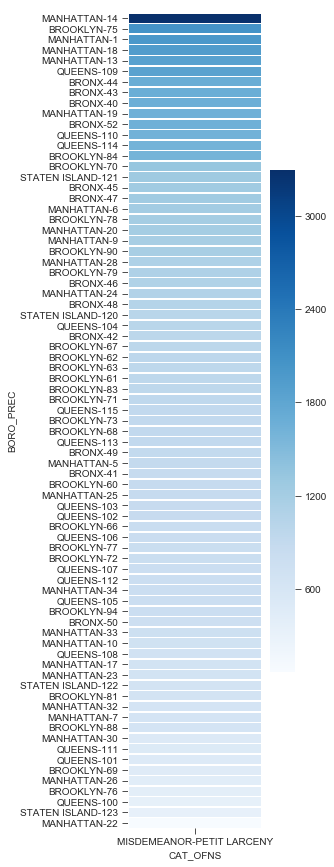

In [49]:
# Draw a heatmap
f, ax = plt.subplots(figsize=(3, 15))
sns.heatmap(petit_lar_2016 , annot=False, fmt="d", linewidths=0.5, ax=ax, cmap="Blues")

There is a higher concentration of petit larceny in Precinct 75 in Brooklyn as well as 4 Manhattan precincts. The lowest 5 are spread across all boroughs.  While there is some overlap these lists are different from the top 5 and bottom 5 for overall crime. Some areas with relatively high overall crime as compared to other precincts don't necessarily have the highest rates of petit larceny and vice versa.

In [50]:
#merge petite larceny values into map dataframe
precincts_2016 = precincts_2016.merge(petit_lar_2016, left_on = 'BORO_PREC',
                      right_index = True, how = 'left')

In [51]:
precincts_2016.head()

,Precinct,Shape_Leng,Shape_Area,geometry,CMPLNT_FR_DATE_YEAR,PRECINCT,BORO_PREC,CMPLNT_NUM_count_sum,MISDEMEANOR-PETIT LARCENY
0,1,79979.343304,4.718208e+07,(POLYGON ((972081.7882080078 190733.4674072266...,2016,1,MANHATTAN-1,6137,1989
1,5,18676.124259,1.808880e+07,"POLYGON ((987399.2067871094 202660.9920043945,...",2016,5,MANHATTAN-5,4258,897
2,6,27182.610113,2.213193e+07,"POLYGON ((984337.591796875 208351.1055908203, ...",2016,6,MANHATTAN-6,4583,1230
3,7,17301.475777,1.836339e+07,"POLYGON ((991608.8134155273 201215.206237793, ...",2016,7,MANHATTAN-7,4309,639
4,9,19773.401872,2.139401e+07,"POLYGON ((992119.1235961914 204042.7609863281,...",2016,9,MANHATTAN-9,5534,1182


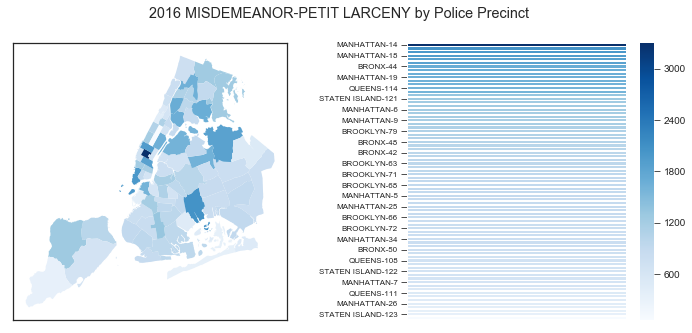

In [89]:
#view heat map of petit larceny in 2016 by precinct
heat_maps_plot("2016 MISDEMEANOR-PETIT LARCENY by Police Precinct",'MISDEMEANOR-PETIT LARCENY',petit_lar_2016)

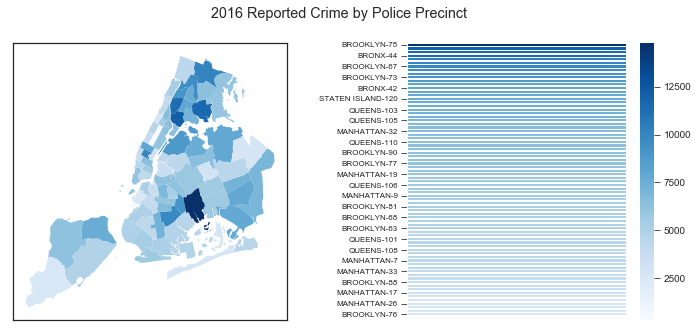

In [90]:
#compare to heat map of all crime in 2016 by precinct
heat_maps_plot("2016 Reported Crime by Police Precinct",'CMPLNT_NUM_count_sum',precinct_pivot[[2016]])